# PCA

In [3]:
# imports
from importlib import reload
import sys
import h5py
import os
import numpy as np
from scipy import stats

import pandas
import seaborn as sns
from matplotlib import pyplot as plt

#
from ulmo import io as ulmo_io
from ulmo.plotting import plotting

sys.path.append('../')
import scattering

from sklearn import decomposition


# Load Coeffs

In [2]:
st_coeff_file = os.path.join(os.getenv('OS_SST'), 'MODIS_L2', 'Scattering',
                             'MODIS_2009_ST_coeff.h5')
coeffs = scattering.io.load_coeffs(st_coeff_file)

# Pack em for the PCA

In [5]:
coeffs['S1_iso'].shape, coeffs['S2_iso'].shape

((757592, 5), (757592, 5, 5, 4))

In [26]:
coeffs['S2_iso'][0,:,:,0] 

array([[0.00672076, 0.00836379, 0.00831475, 0.0078037 , 0.00785504],
       [       nan, 0.0098749 , 0.0130223 , 0.01327168, 0.01394485],
       [       nan,        nan, 0.0149372 , 0.02033969, 0.02321535],
       [       nan,        nan,        nan, 0.02167066, 0.03222383],
       [       nan,        nan,        nan,        nan, 0.0257007 ]])

## Try all non NaN

In [28]:
S2_nonan = []
for J in range(5):
    for J2 in range(J,5):
        S2_nonan.append(coeffs['S2_iso'][:,J,J2,:])
S2_nonan = np.concatenate(S2_nonan, axis=1)
S2_nonan.shape

(757592, 60)

### Check

In [25]:
S2_nonan[0]

array([0.00672076, 0.00505516, 0.00330613, 0.00506095, 0.00836379,
       0.00610342, 0.00384366, 0.00609046, 0.00831475, 0.00583304,
       0.00363514, 0.00591579, 0.0078037 , 0.00540127, 0.0033103 ,
       0.00545817, 0.00785504, 0.00503313, 0.00302674, 0.00519695,
       0.0098749 , 0.00724914, 0.00442579, 0.00724205, 0.0130223 ,
       0.0093105 , 0.00580608, 0.00937914, 0.01327168, 0.00950163,
       0.00589511, 0.00961261, 0.01394485, 0.00894349, 0.00567469,
       0.00954398, 0.0149372 , 0.01114429, 0.00697815, 0.01150089,
       0.02033969, 0.01477168, 0.00894679, 0.01510488, 0.02321535,
       0.01525683, 0.00999014, 0.01525244, 0.02167066, 0.01658853,
       0.01059494, 0.01635721, 0.03222383, 0.02219385, 0.01498795,
       0.02021754, 0.0257007 , 0.02004954, 0.01925548, 0.01569059])

In [29]:
packed = np.concatenate([coeffs['S1_iso'], S2_nonan], axis=1)
packed.shape

(757592, 65)

In [30]:
np.any(np.isnan(packed))

False

# Mean

In [33]:
mean_coeff = np.mean(packed, axis=0)

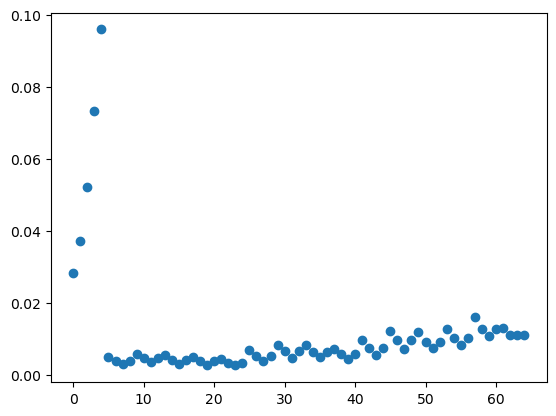

In [36]:
plt.clf()
ax = plt.gca()
ax.plot(mean_coeff, 'o')
plt.show()

# PCA time

In [47]:
subset = packed

## Fit

In [48]:
pca_fit = decomposition.PCA(n_components=packed.shape[1]).fit(subset)

## Explore

In [49]:
M = pca_fit.components_
M.shape

(65, 65)

In [50]:
Y = pca_fit.transform(subset)

## Variance

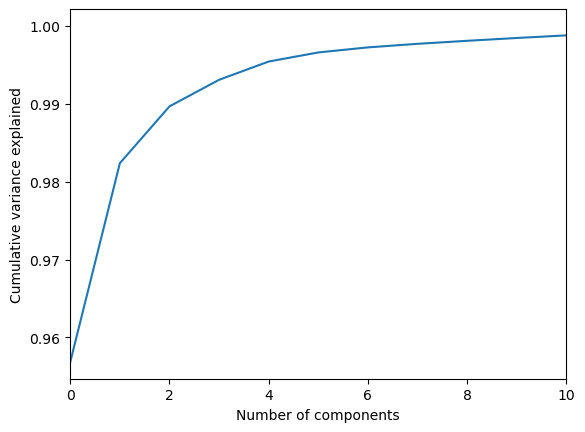

In [51]:
plt.clf()
ax = plt.gca()
ax.plot(np.cumsum(pca_fit.explained_variance_ratio_))
# Label
ax.set_ylabel('Cumulative variance explained')
ax.set_xlabel('Number of components')
#
ax.set_xlim(0,10.)
#
plt.show()

# Eigenvectors

## First -- this affects DT

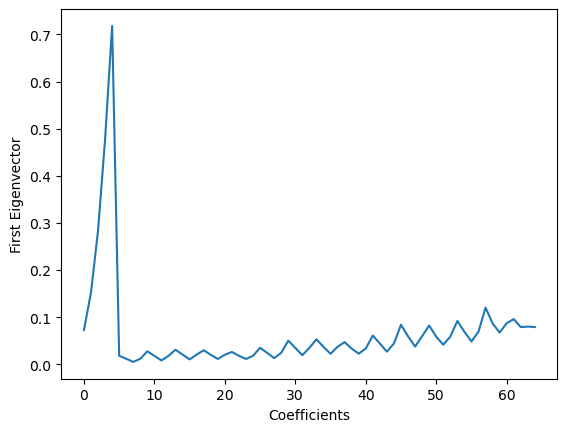

In [53]:
plt.clf()
ax = plt.gca()
ax.plot(M[0])
#
ax.set_xlabel('Coefficients')
ax.set_ylabel('First Eigenvector')
#
plt.show()

## Second

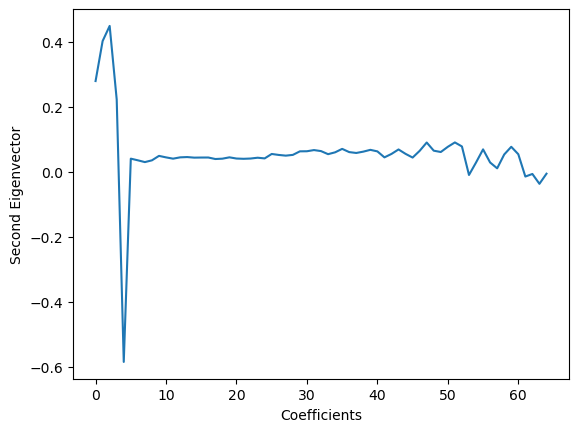

In [54]:
plt.clf()
ax = plt.gca()
ax.plot(M[1])
#
ax.set_xlabel('Coefficients')
ax.set_ylabel('Second Eigenvector')
#
plt.show()

In [55]:
M[1]

array([ 0.27913788,  0.40209226,  0.44870627,  0.22227056, -0.58476949,
        0.04044963,  0.03534389,  0.02986353,  0.03528253,  0.04898355,
        0.04436842,  0.04042365,  0.04443564,  0.04536133,  0.04356776,
        0.04388492,  0.04396716,  0.03932827,  0.04038519,  0.04449717,
        0.04081607,  0.03998904,  0.04083013,  0.04330611,  0.04121387,
        0.05485901,  0.05185418,  0.04972744,  0.05202882,  0.06294682,
        0.06322217,  0.0668342 ,  0.06368927,  0.05423471,  0.05991835,
        0.07052833,  0.06061001,  0.05794017,  0.06202932,  0.06754083,
        0.06280654,  0.04438533,  0.05496881,  0.06875062,  0.05516216,
        0.04379882,  0.06445565,  0.09009964,  0.06495804,  0.06086169,
        0.07692928,  0.09036286,  0.07795423, -0.00976128,  0.02854477,
        0.06901181,  0.02864316,  0.01066329,  0.05328789,  0.07690408,
        0.05408974, -0.01458985, -0.00665731, -0.0369428 , -0.00584059])

----

# Let's normalize S1 and S2 separately

In [62]:
packed_norm = np.concatenate([coeffs['S1_iso']/np.mean(coeffs['S1_iso']), S2_nonan/np.mean(S2_nonan)], axis=1)

In [63]:
packed_norm.shape

(757592, 65)

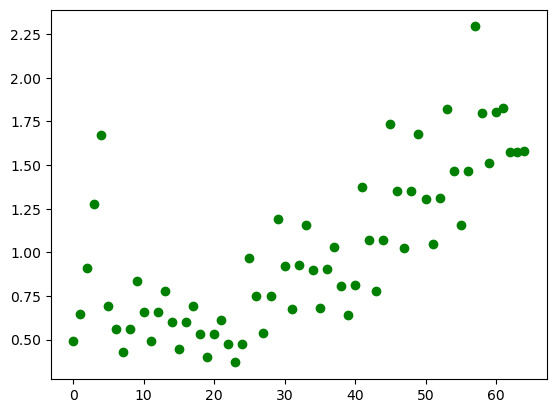

In [64]:
mean_coeff_norm = np.mean(packed_norm, axis=0)
plt.clf()
ax = plt.gca()
ax.plot(mean_coeff_norm, 'og')
plt.show()

## PCA

In [65]:
pca_fit_norm = decomposition.PCA(n_components=packed_norm.shape[1]).fit(packed_norm)

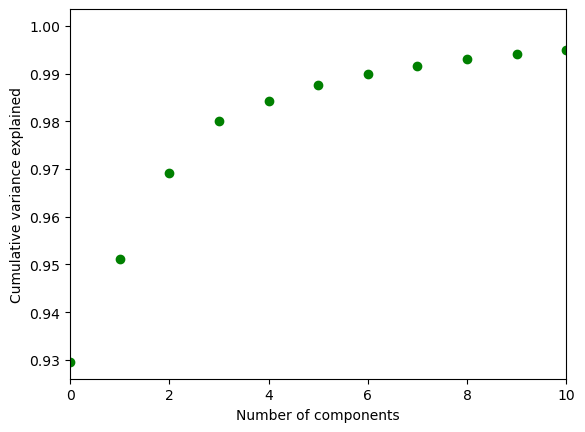

In [72]:
plt.clf()
ax = plt.gca()
ax.plot(np.cumsum(pca_fit_norm.explained_variance_ratio_), 'o', color='g')
# Label
ax.set_ylabel('Cumulative variance explained')
ax.set_xlabel('Number of components')
#
ax.set_xlim(0,10.)
#
plt.show()

## Eigenvectors

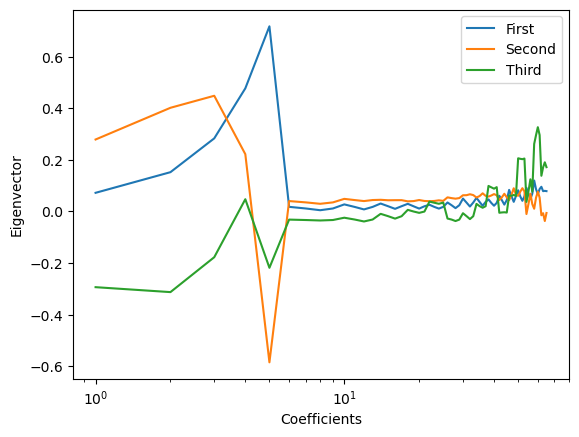

In [71]:
plt.clf()
ax = plt.gca()
xval = np.arange(M.shape[1]) + 1
ax.plot(xval, M[0], label='First')
ax.plot(xval, M[1], label='Second')
ax.plot(xval, M[2], label='Third')
#
ax.set_xlabel('Coefficients')
ax.set_ylabel('Eigenvector')

ax.set_xscale('log')

ax.legend()
#
plt.show()